In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 차원축소 

- dimension reduction
- 차원(dimension)이란? 데이터를 구성하고 있는 속성의 갯수 
- 차원 축소란? 높은 차원의 데이터를 낮은 차원으로 줄여 특징을 살펴보는 기법
- 데이터의 차원이 커지면 커질수록 계산 복잡도와 정확도가 떨어진다. 다차원 데이터를 설명할 수 있는 핵심 축을 찾는다면, 작은 차원으로 모든 데이터를 설명할 수 있다.
- 차원 축소에서는 데이터의 분산이 가장 크게 나타나는 방향을 찾는 것이 가장 중요하며 첫 방향을 1번째 주성분(1st PC. (principal component)라고 한다. 

- PCA(principal component) : 
- https://www.freecodecamp.org/news/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335/

# 차원의 저주 현상

- Curse of Dimensionality
- 차원이 높아지면 데이터의 밀집도가 증가하여 모든 것이 작아지고 부족하게 되는 현상.
- 데이터의 차원이 커질 수록 필요한 데이터의 수가 그만큼 증가하게 되고, 이에 따라 모델의 성능이 저하되는 현상. 또한 동시에 데이터 간의 거리가 벌어져 밀도가 희소해지는데(sparse), 이런 경우 거리에 기반한 알고리즘 성능이 매우 떨어진다


- 데이터의 밀집도 (Data Density)
    - 차원이 다르면 Data의 밀집도가 달라진다.
    - N개의 Data를 서로 다른 차원에서 다룰때 데이터의 밀집도가 달라지는 모습을 표현하고 있다.
    - 1차원에서 데이터의 밀집도는 N/5로 하나의 큐브는 N/5 샘플을 가진다.
    - 2차원에서 데이터의 밀집도는 N/25로 하나의 큐브는 N/25 샘플을 가진다.
    - 3차원에서 데이터의 밀집도는 N/125로 하나의 큐브는 N/125 샘플을 가진다.
    - 차원이 높아지면 데이터의 밀집도는 작아지는 것을 볼 수 있다.
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FeqhE2m%2FbtqB3phXvI5%2F9JTu6FPahVbeOkv0HlKWpK%2Fimg.png'>
    

# PCA

- Principal Component
- 기존 raw 데이터에 존재하는 Feature 들로 새로운 Feature 를 생성하여 Feature 를 줄여나가는 방식
- 데이터의 분산(Variance)을 최대한 보존하면서 서로 직교하는 축을 찾아 고차원의 공간의 표본을 저 차원으로 변환하는 차원 축소 기법
- 기존의 축이 아닌 새로운 축을 찾는다 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHso5m%2FbtqNCdErDdE%2FuvG1g8UkuJetTDXPlVCFK0%2Fimg.png' width='300'>

```
from sklearn.decomposition import PCA

# pca 객체 정의. n_components 는 차원의 수 
pca = PCA(n_components=2)

# 2차원 PCA값으로 각 데이터 차원축소
pca_transformed = pca.fit_transform(Xdata)

# 별도 변수로 저장 
pca_x = pca_transformed[:,0]
pca_y = pca_transformed[:,1]

```

## 붓꽃 데이타셋에 PCA 차원 축소 적용 

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['target']=iris.target
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target
27,5.2,3.5,1.5,0.2,0
67,5.8,2.7,4.1,1.0,1
45,4.8,3.0,1.4,0.3,0


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

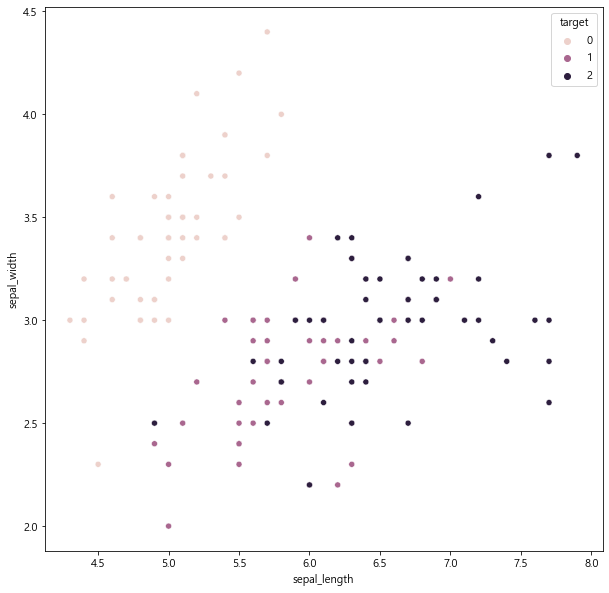

In [5]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_df, hue='target')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

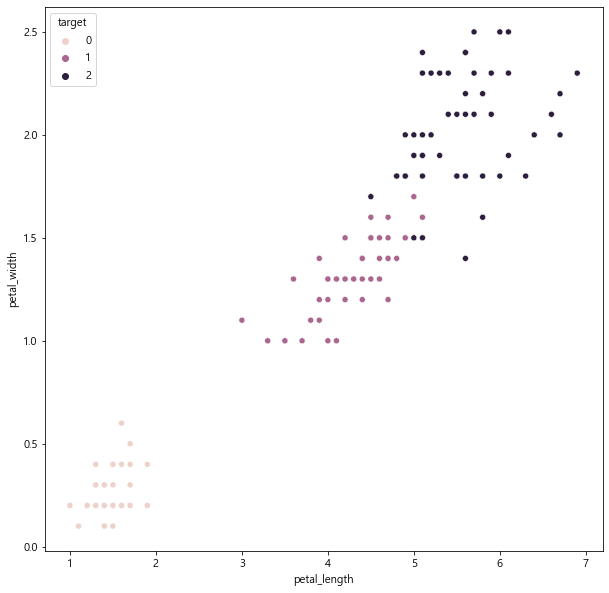

In [6]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df, hue='target')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.fit_transform(iris.data)

In [8]:
iris_scaled.shape

(150, 4)

In [9]:
iris_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target,pca_x,pca_y
32,5.2,4.1,1.5,0.1,0,-2.648862,0.813364
11,4.8,3.4,1.6,0.2,0,-2.612755,0.014730
77,6.7,3.0,5.0,1.7,1,1.557802,0.267495


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

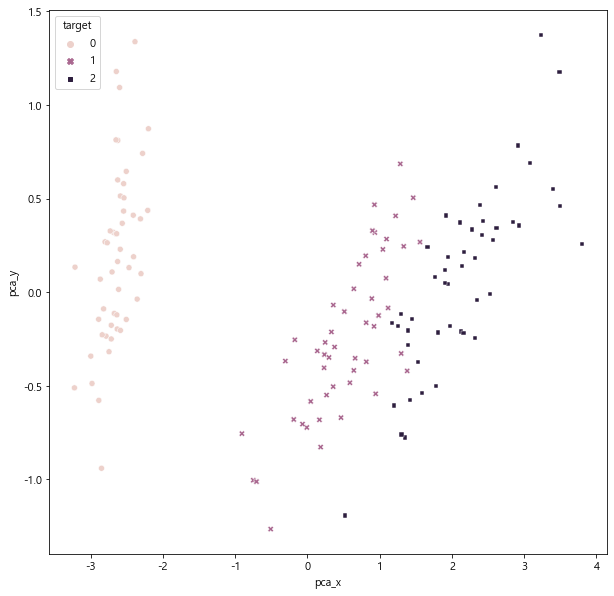

In [11]:
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='target', style='target')

## 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교 **

In [12]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=iris.target)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

1.0

In [13]:
iris_df['target']=iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, iris.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=iris.target)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

1.0

# 퀴즈 : 
펭귄 데이타를 이용하여 PCA 데이타를 이용할때와 원본 데이타를 이용할 때 분류 모델에 성능의 차이가 있는지 확인하여라.
분류 모델은 임의로 지정한다. 

sns.load_dataset('penguins')

In [15]:
penguin = sns.load_dataset('penguins')

In [16]:
penguin.dropna(inplace=True)

In [17]:
X = penguin.iloc[:,1:]
y = penguin.species

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohencoder = X[['island', 'sex']]
continuous = X[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']]

In [20]:
ohe = OneHotEncoder(drop = 'first',sparse = False)
ohencoder_df = ohe.fit_transform(ohencoder)


In [21]:
ohencoder = pd.DataFrame(ohencoder_df, columns= ohe.get_feature_names(['island', 'sex']))

In [22]:
continuous.reset_index()

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,1,39.5,17.4,186.0,3800.0
2,2,40.3,18.0,195.0,3250.0
3,4,36.7,19.3,193.0,3450.0
4,5,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
328,338,47.2,13.7,214.0,4925.0
329,340,46.8,14.3,215.0,4850.0
330,341,50.4,15.7,222.0,5750.0
331,342,45.2,14.8,212.0,5200.0


In [23]:
X = pd.concat([ohencoder, continuous.reset_index()], axis = 1)

In [24]:
X.drop(['index'], axis =1, inplace = True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=y)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

0.835820895522388

In [26]:
X

,island_Dream,island_Torgersen,sex_Male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.0,1.0,1.0,39.1,18.7,181.0,3750.0
1,0.0,1.0,0.0,39.5,17.4,186.0,3800.0
2,0.0,1.0,0.0,40.3,18.0,195.0,3250.0
3,0.0,1.0,0.0,36.7,19.3,193.0,3450.0
4,0.0,1.0,1.0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,47.2,13.7,214.0,4925.0
329,0.0,0.0,0.0,46.8,14.3,215.0,4850.0
330,0.0,0.0,1.0,50.4,15.7,222.0,5750.0
331,0.0,0.0,0.0,45.2,14.8,212.0,5200.0


In [27]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [28]:
pca.explained_variance_

array([6.48533565e+05, 5.07497565e+01, 1.62246859e+01, 2.45173074e+00,
       1.80041533e-01])

In [29]:
sum(pca.explained_variance_ratio_)

0.9999997718263204

In [30]:
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=y)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

0.835820895522388

# Digit

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [32]:
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target
digits_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [33]:
digits_df.shape

(1797, 65)

In [34]:
digits_df.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [35]:
digits_df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
digits_df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [37]:
digits.images.shape

(1797, 8, 8)

In [38]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

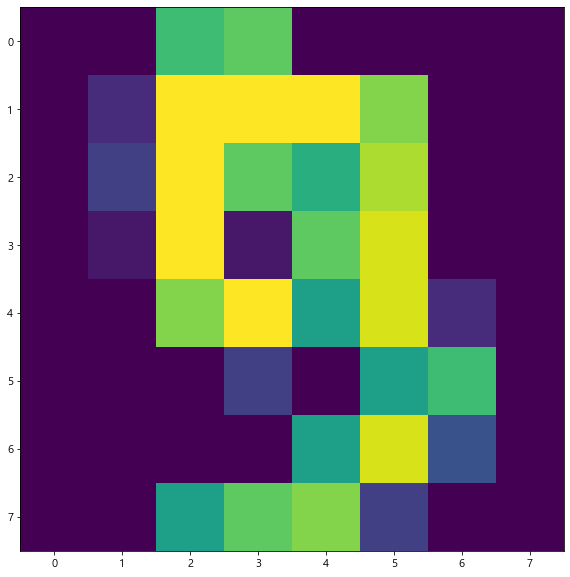

In [39]:
plt.imshow(digits.images[9])

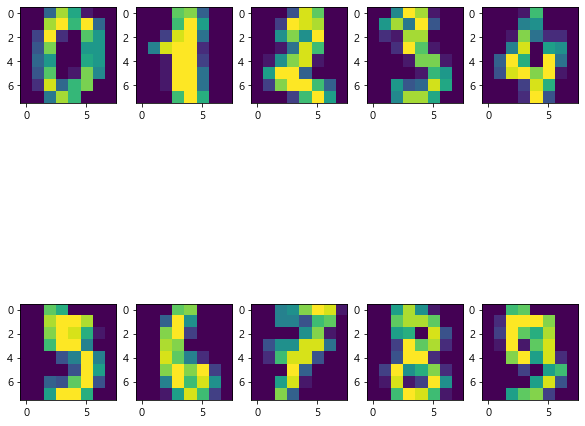

In [40]:
fig, axes = plt.subplots(2, 5)
# axes[0,0].imshow(digits.images[9])
num = 0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(digits.images[num])
        num += 1


In [41]:
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
961,0.0,0.0,8.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,16.0,15.0,2.0,0.0,3
325,0.0,0.0,0.0,9.0,15.0,16.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,9
550,0.0,0.0,2.0,13.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,16.0,16.0,3.0,0.0,6


In [42]:
pca_2 = PCA(n_components=2)

pca_transformed2 = pca.fit_transform(digits.data)

digits_df['pca_x'] = pca_transformed2[:,0]
digits_df['pca_y'] = pca_transformed2[:,1]
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,pca_x,pca_y
1078,0.0,2.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,9.0,16.0,16.0,7.0,0.0,0,0.299454,20.044978
1350,0.0,0.0,10.0,16.0,16.0,10.0,1.0,0.0,0.0,4.0,...,0.0,11.0,16.0,16.0,15.0,4.0,0.0,3,-28.365276,12.041106
25,0.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0,3.0,...,0.0,11.0,14.0,9.0,0.0,0.0,0.0,5,6.111417,-5.461904


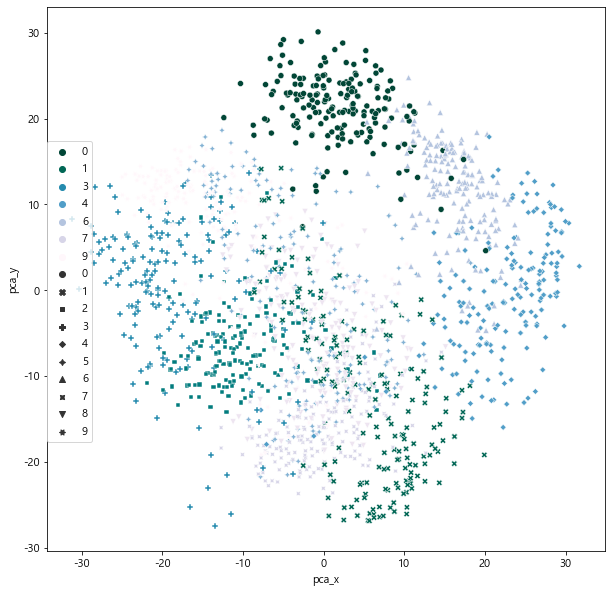

In [43]:
sns.scatterplot(x='pca_x', y='pca_y', data=digits_df, hue='target', palette='PuBuGn_r', style='target')
plt.legend(loc=[0,0.2])

## 10차원

In [44]:
pca = PCA(n_components=10)

pca_transformed = pca.fit_transform(digits.data)
columns_list = ['pca'+str(i) for i in range(10)]
df_pca = pd.DataFrame(pca_transformed, columns=columns_list)
df_pca['target'] = digits.target
df_pca.head(2)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,target
0,-1.259383,21.274882,-9.463160,13.014152,-7.129360,-7.440110,3.256839,2.560975,-0.565910,3.648148,0
1,7.957712,-20.768689,4.439424,-14.893819,5.895698,-6.484257,2.130655,-4.612841,3.603276,-1.052833,1


In [45]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=digits.target)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9583333333333334

In [46]:
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, digits.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=digits.target)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.95

In [58]:
img_path 

'~/Dropbox/python숙달/data/berry.jpg'

In [65]:
import cv2

img_path = 'berry.jpg'
#img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path)


In [66]:
img.shape

(435, 450, 3)

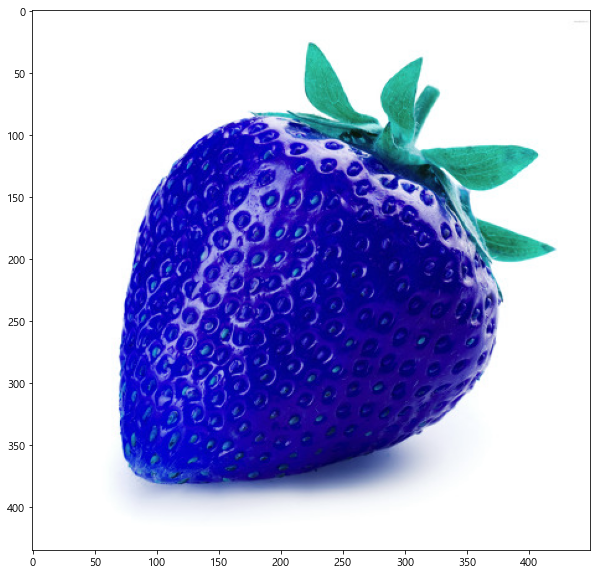

In [67]:
plt.imshow(img)

In [68]:
# 이미지 크기 줄이기 
img_resized = cv2.resize(img, dsize=(7, 7))

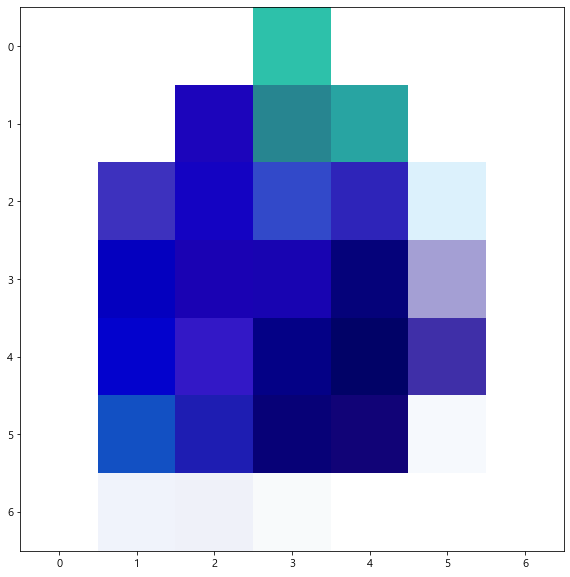

In [69]:
plt.imshow(img_resized)

# LDA

- Linear Discriminant Analysis
- 선형 판별 분석(Linear Discriminant Analysis, LDA)
- PCA가 데이터의 전체적인 분포를 참고하여 새로운 basis를 설정하고, 그 축에 맞게 데이터를 새롭게 projection 하는 것이 목표라면, LDA는 지도적인 방법으로 basis를 찾아서 그 축을 분리에 이용한 뒤, 최적의 분리를 완성한 뒤 projection을 하는 것이 목표이다.
- LDA에서는 일반적으로 스케일러 사용



<img src='https://nirpyresearch.com/wp-content/uploads/2018/11/PCAvsLDA-1024x467.png' width='500'>


- sklearn의 LDA


```
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X, y)

data_lda = lda.transform(X)
```

## 붓꽃 데이터 셋에 LDA 적용하기 m

In [70]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['target']=iris.target
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target
26,5.0,3.4,1.6,0.4,0
34,4.9,3.1,1.5,0.2,0
10,5.4,3.7,1.5,0.2,0


In [71]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

In [73]:
iris_df['target'] = iris.target

iris_df['lda_x'] = iris_lda[:,0]
iris_df['lda_y'] = iris_lda[:,1]
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target,lda_x,lda_y
18,5.7,3.8,1.7,0.3,0,8.078359,0.968581
96,5.7,2.9,4.2,1.3,1,-1.616156,-0.470104
44,5.1,3.8,1.9,0.4,0,6.859444,1.051654


<AxesSubplot:xlabel='lda_x', ylabel='lda_y'>

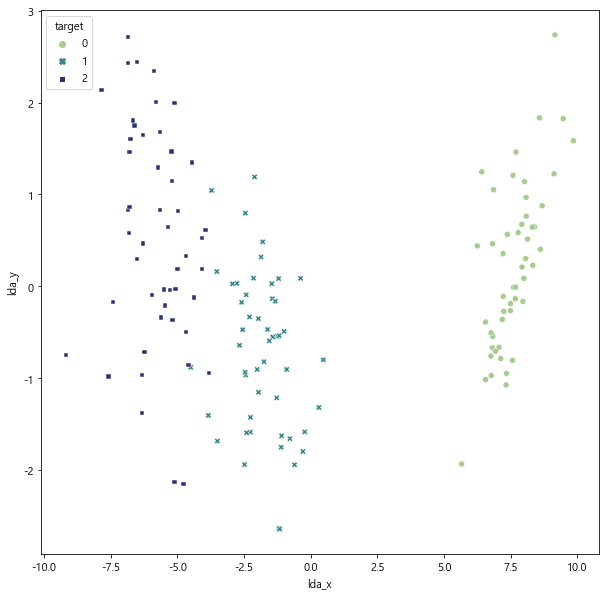

In [74]:
sns.scatterplot(x='lda_x', y='lda_y', data=iris_df, hue='target', style='target', palette='crest')

## digit 데이타셋 활용

In [75]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [76]:
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target
digits_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [77]:
digits_scaled = StandardScaler().fit_transform(digits.data)
digits_scaled.shape

(1797, 64)

In [78]:
digits_df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

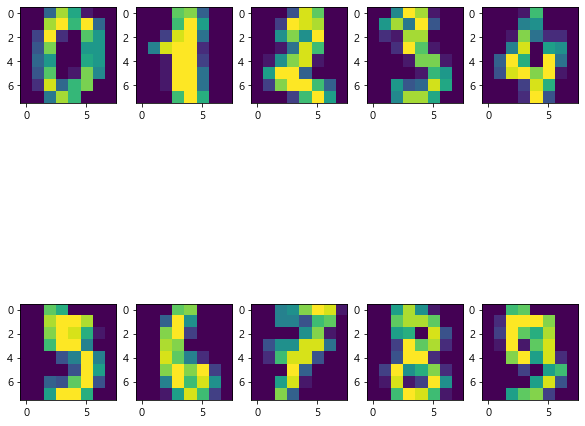

In [79]:
fig, axes = plt.subplots(2, 5)
# axes[0,0].imshow(digits.images[9])
num = 0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(digits.images[num])
        num += 1

In [80]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(digits_scaled, digits.target)
digits_lda = lda.transform(digits_scaled)
digits_lda.shape

(1797, 2)

In [81]:
digits_df['lda_x'] = digits_lda[:,0]
digits_df['lda_y'] = digits_lda[:,1]
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,lda_x,lda_y
543,0.0,0.0,4.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,...,0.0,3.0,16.0,9.0,0.0,0.0,0.0,7,-1.623392,-0.562146
1178,0.0,0.0,0.0,8.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,13.0,2.0,0.0,0.0,1,0.228250,-1.183119
82,0.0,0.0,0.0,10.0,15.0,3.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.0,15.0,16.0,11.0,0.0,6,1.872536,0.248841


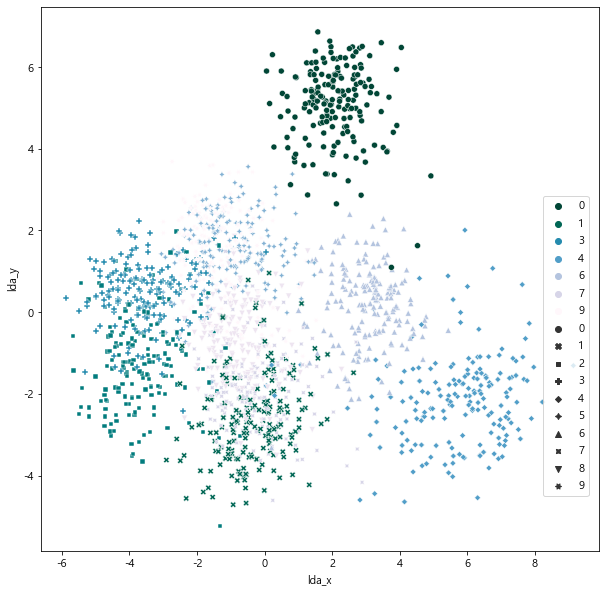

In [82]:
sns.scatterplot(x='lda_x', y='lda_y', data=digits_df, hue='target', palette='PuBuGn_r', style='target')
plt.legend(loc=[0.9,0.1])

## 올리베티 얼굴 사진 데이터

- AT&T와 캠프리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터 베이스의 간략화된 버전. 
- fetch_olivetti_faces() 명령으로 로드하며 다음과 같이 구성되어 있다. 
- 64x64=4096 해상도의 흑백 이미지이고 40명의 사진 400장으로 구성되어 있다.

- 타겟 데이터 : 40명의 개인을 나타내는 식별 번호
- 특징 데이터 : 각 개인의 얼굴 이미지

In [83]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
# print(olivetti.DESCR)
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

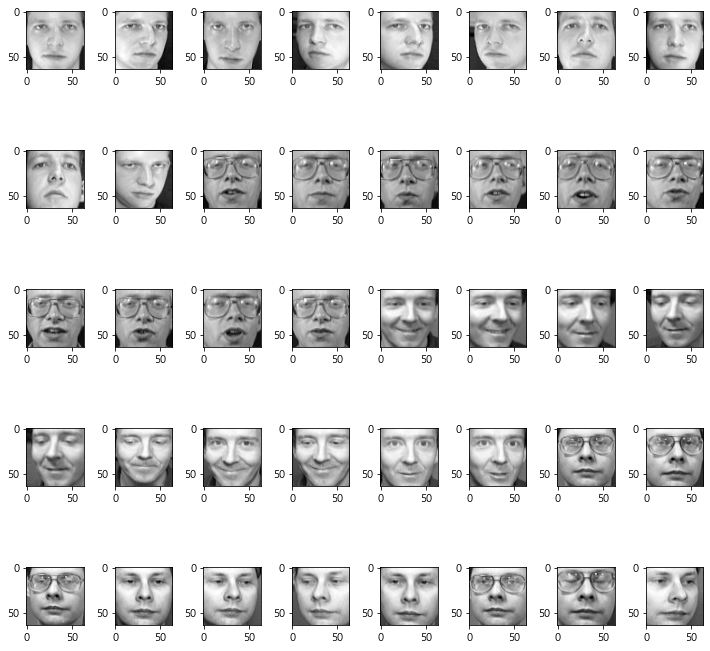

In [84]:
fig, axes = plt.subplots(5, 8)
num = 0
for i in range(5):
    for j in range(8):
        axes[i,j].imshow(olivetti.images[num], cmap=plt.cm.gray)
        num += 1
plt.tight_layout()
plt.show()

In [85]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

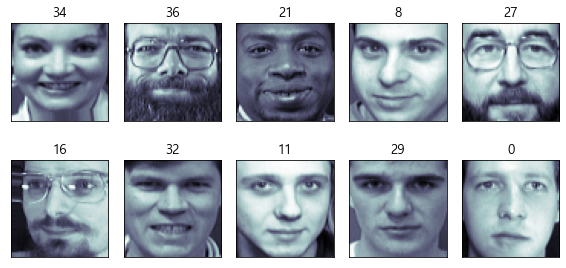

In [86]:
np.random.seed(111)
N = 2
M = 5
fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(olivetti.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(olivetti.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(olivetti.target[k])
plt.tight_layout()
plt.show()

In [87]:
olivetti.data.shape

(400, 4096)

In [88]:
olivetti_df = pd.DataFrame(olivetti.data)
olivetti_df['target'] = olivetti.target
olivetti_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0


In [89]:
olivetti_scaled = StandardScaler().fit_transform(olivetti.data)
olivetti_scaled.shape

(400, 4096)

In [90]:
lda = LinearDiscriminantAnalysis(n_components=2)


lda.fit(olivetti_scaled, olivetti.target)
olivetti_lda = lda.transform(olivetti_scaled)
olivetti_lda.shape

(400, 2)

In [91]:
olivetti_lda_df = pd.DataFrame(olivetti_lda, columns=['lda_x', 'lda_y'])

In [92]:
olivetti_lda_df['target'] = olivetti.target

In [93]:
olivetti_lda_df['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

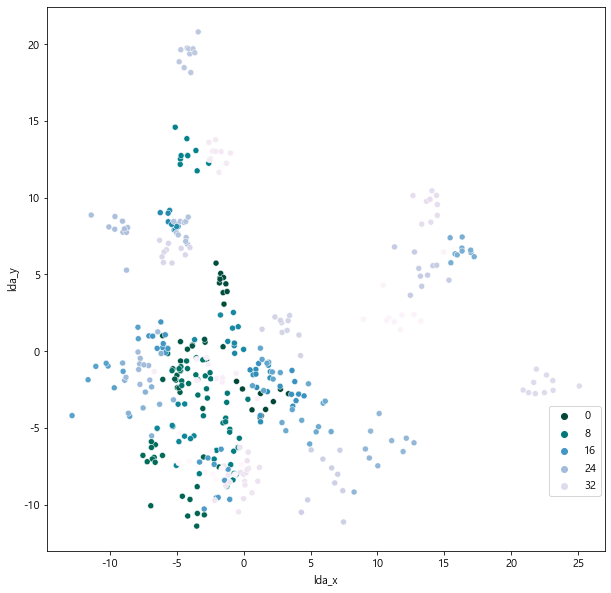

In [94]:
sns.scatterplot(x='lda_x', y='lda_y', data=olivetti_lda_df, hue='target', palette='PuBuGn_r')
plt.legend(loc=[0.9,0.1])